# **K-Means Clustering Algorithm**
Applying k means clustering algorithm on the provided dataset. The output should look like this with a cluster column at the last.                                                                                      


                                           

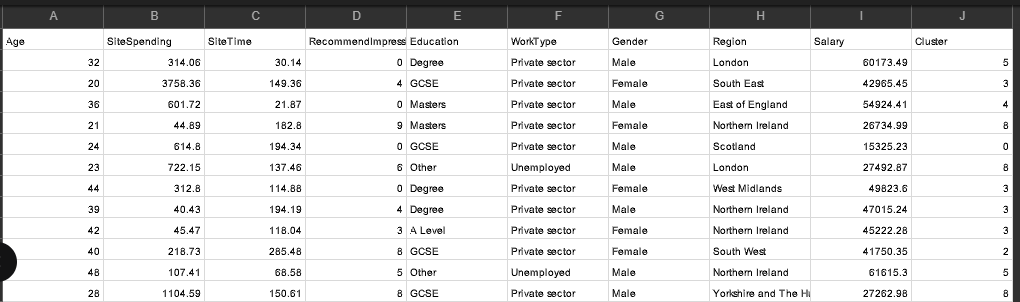

## **Part 1:**                                                             
Implementing the algorithm of k-means clustering using only NumPy and pandas and extract predicted clusters out of it. This is to develop understanding of the underlying logic of the algorithm. Other libraries like sklearn are made use of later in the notebook.

In [4]:
import numpy as np
import pandas as pd

In [5]:
# Load dataset
def load_dataset():
    df = pd.read_excel('Dataset.xlsx')
    return df

# Preprocess dataset: handle categorical variables and normalization
def preprocess_data(df):
    df = df.copy()

    # Encode categorical features using one-hot encoding
    categorical_cols = ['Education', 'WorkType', 'Gender', 'Region']
    df = pd.get_dummies(df, columns=categorical_cols)

    # Normalize numerical features
    numerical_cols = ['Age', 'SiteSpending', 'SiteTime', 'RecommendImpression', 'Salary']
    df[numerical_cols] = (df[numerical_cols] - df[numerical_cols].mean()) / df[numerical_cols].std()

    return df

In [6]:
def kmeans_from_scratch(X, k, max_iters=100):
    np.random.seed(42)
    # Step 1: Initialize centroids randomly
    initial_centroid_indices = np.random.choice(X.shape[0], k, replace=False)
    centroids = X[initial_centroid_indices]

    for _ in range(max_iters):
        labels = []

        # Step 2: Assign points to nearest centroid (using manual loop)
        for point in X:
            distances = []
            for centroid in centroids:
                distance = np.linalg.norm(point - centroid)
                distances.append(distance)
            closest_cluster = np.argmin(distances)
            labels.append(closest_cluster)

        labels = np.array(labels)

        # Step 3: Recalculate centroids
        new_centroids = []
        for i in range(k):
            cluster_points = X[labels == i]
            if len(cluster_points) > 0:
                new_centroid = cluster_points.mean(axis=0)
            else:
                # Handle empty cluster by reinitializing randomly
                new_centroid = X[np.random.choice(X.shape[0])]
            new_centroids.append(new_centroid)

        new_centroids = np.array(new_centroids)

        # Step 4: Check convergence
        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    return labels, centroids


In [7]:
k = 3
max_iter = 200
df = load_dataset()
df_processed = preprocess_data(df)
X = df_processed.values.astype(float)
labels, centroids = kmeans_from_scratch(X, k)
df['Cluster'] = labels
print(df.head())

   Age  SiteSpending  SiteTime  RecommendImpression Education        WorkType  \
0   32        314.06     30.14                    0    Degree  Private sector   
1   20       3758.36    149.36                    4      GCSE  Private sector   
2   36        601.72     21.87                    0   Masters  Private sector   
3   21         44.89    182.80                    9   Masters  Private sector   
4   24        614.80    194.34                    0      GCSE  Private sector   

   Gender            Region    Salary  Cluster  
0    Male            London  60173.49        2  
1  Female        South East  42965.45        0  
2    Male   East of England  54924.41        2  
3  Female  Northern Ireland  26734.99        1  
4    Male          Scotland  15325.23        2  


## **Part 2 & 3:**

 Using the sklearn library to implement the k means clustering algorithm in a professional way and then use matplotlib to visualize the clusters using PCA (2D)

In [25]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def visualize_clusters(X, labels, title):
    # Step 1: Apply PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    # Step 2: Create scatter plot
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)

    # Step 3: Add labels and title
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(title)
    plt.colorbar(scatter, label='Cluster')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


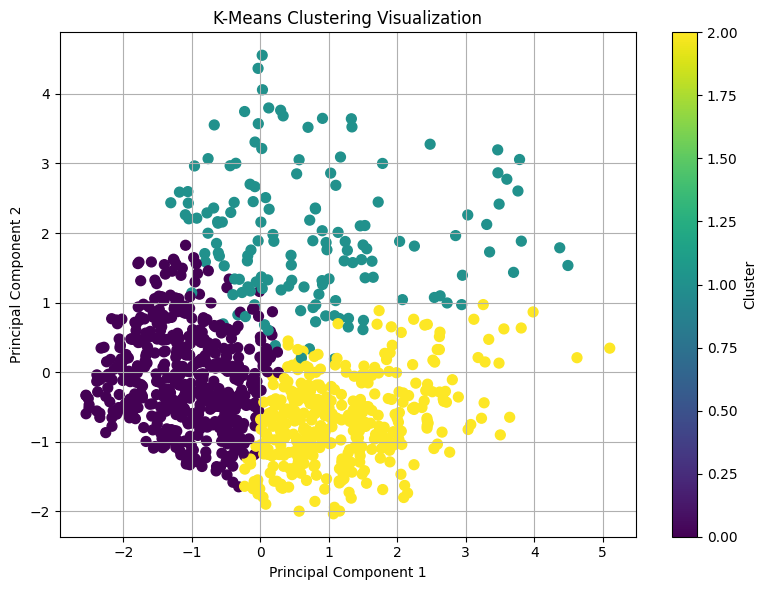

   Age  SiteSpending  SiteTime  RecommendImpression Education        WorkType  \
0   32        314.06     30.14                    0    Degree  Private sector   
1   20       3758.36    149.36                    4      GCSE  Private sector   
2   36        601.72     21.87                    0   Masters  Private sector   
3   21         44.89    182.80                    9   Masters  Private sector   
4   24        614.80    194.34                    0      GCSE  Private sector   

   Gender            Region    Salary  Cluster  
0    Male            London  60173.49        0  
1  Female        South East  42965.45        1  
2    Male   East of England  54924.41        0  
3  Female  Northern Ireland  26734.99        2  
4    Male          Scotland  15325.23        0  


In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
# Load dataset
def load_datasett():
    df = pd.read_excel('Dataset.xlsx')
    return df
def preprocess_dataa(df):
    df = df.copy()

    # One-hot encode categorical columns
    categorical_cols = ['Education', 'WorkType', 'Gender', 'Region']
    df = pd.get_dummies(df, columns=categorical_cols)

    # Normalize numerical columns
    numerical_cols = ['Age', 'SiteSpending', 'SiteTime', 'RecommendImpression', 'Salary']
    scaler = StandardScaler()
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

    return df

# Load and preprocess
df = load_datasett()
df_processed = preprocess_dataa(df)

# Convert to numpy array
X = df_processed.values

# Apply KMeans from scikit-learn
k = 3
max_iter = 200
kmeans = KMeans(n_clusters=k, max_iter=max_iter)
labels = kmeans.fit_predict(X)

# Add cluster labels to original DataFrame
df['Cluster'] = labels

visualize_clusters(X, labels, "K-Means Clustering Visualization")

print(df.head())
